In [4]:

# call __init_ to set notebook seed
import set_notebook_env
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import statsmodels.formula.api as smf
from scipy.stats import mannwhitneyu

from collections import defaultdict
import numpy as np

import set_notebook_env
loader, plot_utils = set_notebook_env.set_env(
    data_dir="../data/", 
    min_ratings=0, 
    max_ratings=None,
    drop_inconsistent_gender = True
)

np.random.get_state()[1][0]

Using seed: 18787288


18787288

In [8]:
loader.initial_setup()
cleaned_df = loader.add_gender_code(loader.cleaned_df)
cleaned_df.columns

Index(['avg_rating', 'avg_difficulty', 'num_ratings', 'pepper',
       'would_take_again_prop', 'num_online_ratings', 'male', 'female',
       'tough_grader', 'good_feedback', 'respected', 'lots_to_read',
       'participation_matters', 'no_skip', 'lots_of_hw', 'inspirational',
       'pop_quizzes', 'accessible', 'papers', 'clear_grading', 'hilarious',
       'test_heavy', 'few_things', 'amazing_lectures', 'caring',
       'extra_credit', 'group_projects', 'lecture_heavy', 'major',
       'university', 'state', 'gender_code'],
      dtype='object')

# Dispersion

Test whether dispersion differs by gender using a permutation test on absolute variance difference:


Null hypothesis: gender labels are exchangeable --> no true variance difference.


In [ ]:
ratings = cleaned_df['avg_rating'].to_numpy()
gender = cleaned_df['gender_code'].to_numpy()

In [12]:
# ddof means Delta Degrees of Freedom
# we do this because we want the divisor to be N - 1

var_male = np.var(ratings[gender == 0], ddof=1)
var_female = np.var(ratings[gender == 1], ddof=1)

obs_stat = np.abs(var_male - var_female)
obs_stat

0.13112915872068132

In [ ]:
n_perms = 10000
perm_stats = np.zeros(n_perms)

for i in range(n_perms):
    perm_gender = np.random.permutation(gender)
    
    perm_var_m = np.var(ratings[perm_gender == 0], ddof=1) # male
    perm_var_f = np.var(ratings[perm_gender == 1], ddof=1) # female
    
    perm_stats[i] = np.abs(perm_var_m - perm_var_f)

In [19]:
p_value = np.mean(perm_stats >= obs_stat)
p_value

0.0

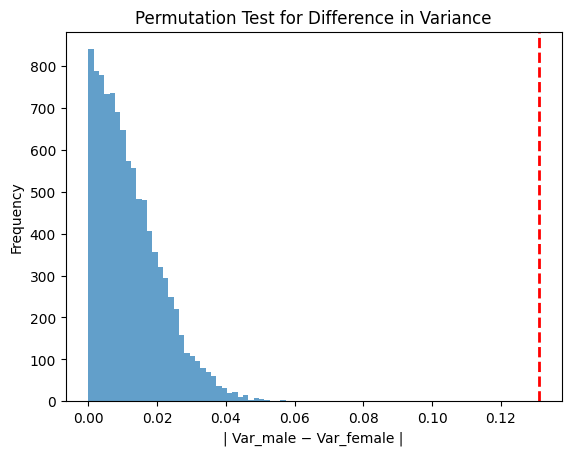

In [20]:
import matplotlib.pyplot as plt

plt.hist(perm_stats, bins=40, alpha=0.7)
plt.axvline(obs_stat, color='red', linestyle='--', linewidth=2)
plt.xlabel("| Var_male − Var_female |")
plt.ylabel('Frequency')
plt.title('Permutation Test for Difference in Variance')
plt.show()


A permutation test on the absolute difference in variances indicates a statistically significant difference in dispersion between male and female professors’ ratings.

In [26]:
def iqr(x):
    q75, q25 = np.percentile(x, [75, 25])
    return q75 - q25

iqr_male = iqr(ratings[gender == 0])
iqr_female = iqr(ratings[gender == 1])

obs_stat = np.abs(iqr_male - iqr_female)
obs_stat

0.2999999999999998

In [ ]:
n_perms = 10_000
perm_stats = np.zeros(n_perms)

for i in range(n_perms):
    perm_gender = np.random.permutation(gender)
    
    perm_iqr_m = iqr(ratings[perm_gender == 0])
    perm_iqr_f = iqr(ratings[perm_gender == 1])
    
    perm_stats[i] = np.abs(perm_iqr_m - perm_iqr_f)


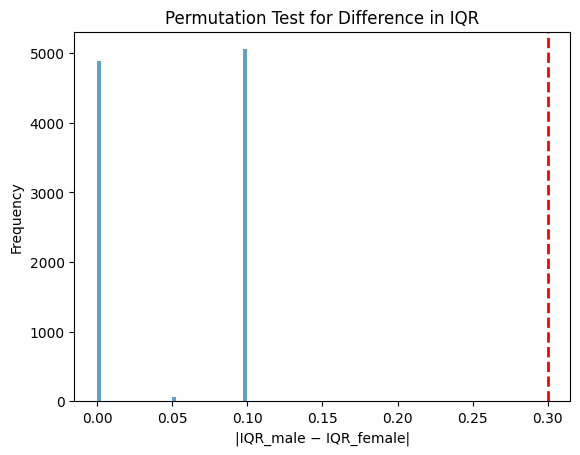

In [27]:
import matplotlib.pyplot as plt

plt.hist(perm_stats, bins=40, alpha=0.7)
plt.axvline(obs_stat, color='red', linestyle='--', linewidth=2)
plt.xlabel('|IQR_male − IQR_female|')
plt.ylabel('Frequency')
plt.title('Permutation Test for Difference in IQR')
plt.show()
